In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Checking how many tables there are in every file

In [2]:
def tables(path):
    cursor = sqlite3.connect(path).cursor().execute("SELECT name FROM sqlite_master WHERE type='table';")
    print(cursor.fetchall())

In [3]:
paths = ['amaro-data-analyst-case-2019Q1-files/Customers.db',
         'amaro-data-analyst-case-2019Q1-files/OrderItems.db',
         'amaro-data-analyst-case-2019Q1-files/Orders.db',
         'amaro-data-analyst-case-2019Q1-files/Products.db']
for path in paths:
    tables(path)

[('Customers',)]
[('OrderItems',)]
[('Orders',)]
[('Products',)]


Turning them into pandas dataframes for easier analysis

In [4]:
def creator(path, table_name):
    con = sqlite3.connect(path)
    return pd.read_sql(f'select * from {table_name}', con).replace('', pd.NA)

In [5]:
custmr = creator('amaro-data-analyst-case-2019Q1-files/Customers.db', 'customers')
oitems = creator('amaro-data-analyst-case-2019Q1-files/OrderItems.db', 'orderitems')
orders = creator('amaro-data-analyst-case-2019Q1-files/Orders.db', 'orders')
prdcts = creator('amaro-data-analyst-case-2019Q1-files/Products.db', 'products')

Checking proportion between boleto and other methods

In [6]:
orders['payment_method'] = orders['payment_method'].apply(lambda x: x.upper())

In [7]:
orders['payment_method'].unique()

array(['CARTÃO', 'CRÉDITOS TROCA', 'DEVOLUÇÃO TROCA', 'BOLETO',
       'CORTESIA', 'N/A', 'VISA CREDITO', 'MASTERCARD A VISTA',
       'PÓS-PAGO', 'MASTERCARD CREDITO', 'DÉBITO', 'CRÉDITOS AMARO',
       'MASTERCARD BOLETO', 'REDE-CREDITO A VISTA', 'ELECTRON A VISTA',
       'ELO CREDITO', 'VISA A VISTA', 'MAESTRO A VISTA', 'VISA 4X',
       'AMEX CREDITO', 'AMEX A VISTA', 'ELO CREDITO A VISTA',
       'MASTERCARD 2X', 'DINERS A VISTA', 'DINERS CREDITO', 'VISA 2X',
       'ELO DEBITO A VISTA', 'VISA 3X', 'REDE-CREDITO 3X',
       'MASTERCARD 6X', 'REDE-CREDITO 4X', 'MASTERCARD 4X',
       'MASTERCARD 3X', 'REDE-CREDITO 6X', 'REDE-CREDITO 5X', 'DINERS 2X',
       'VISA 5X', 'REDE-CREDITO 2X', 'CRÉDITOS DESCONTO', 'VISA 6X',
       'CORTESIA MARKETING', 'AMEX 4X', 'DEMONSTRACAO', 'AMEX 6X',
       'DINERS 3X', 'DINERS 6X', 'MASTERCARD 5X', 'DINHEIRO', 'HIPERCARD',
       'REDE-DEBITO A VISTA', 'AMEX 2X', 'AMEX 5X', 'DINERS 4X',
       'HIPERCARD A VISTA'], dtype=object)

In [8]:
orders['payment_method'].apply(lambda x: 'BOLETO' if x == 'BOLETO' else 'OTHER').value_counts(True)

OTHER     0.730467
BOLETO    0.269533
Name: payment_method, dtype: float64

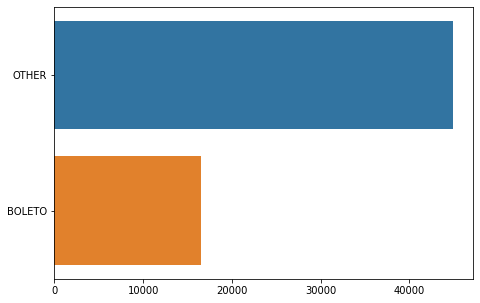

In [89]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y=orders['payment_method'].apply(lambda x: 'BOLETO' if x == 'BOLETO' else 'OTHER'))
ax.set_ylabel('')    
ax.set_xlabel('');

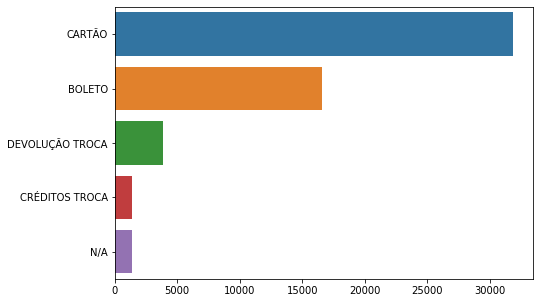

In [90]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.barplot(y=orders['payment_method'].value_counts().iloc[:5].keys(),
            x=orders['payment_method'].value_counts().iloc[:5].values)
ax.set_ylabel('')    
ax.set_xlabel('');

Cleaning order_status column

In [11]:
orders['order_status'].unique()

array(['DELIVERED', 'CANCELLED', 'BILLED / READY TO BE SHIPPED',
       'SHIPPED', 'AWAITING PAYMENT CONFIRMATION', 'PAYMENT CONFIRMED'],
      dtype=object)

In [12]:
orders = orders.drop(index=orders[orders['order_status'] == 'AWAITING PAYMENT CONFIRMATION'].index)
orders['order_status'] = orders['order_status'].apply(lambda x: 'C' if x == 'CANCELLED' else 'P')

Doing same analysis but now comparing cancelation rate

In [13]:
top5 = list(orders['payment_method'].value_counts().iloc[:5].keys())

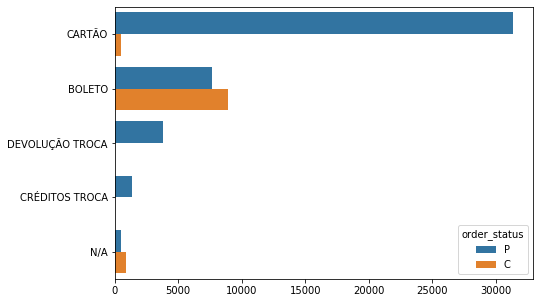

In [91]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y='payment_method',
              data=orders[orders['payment_method'].isin(top5)],
              hue='order_status',
              order=['CARTÃO', 'BOLETO', 'DEVOLUÇÃO TROCA', 'CRÉDITOS TROCA', 'N/A'])
ax.set_ylabel('')    
ax.set_xlabel('');

It's clear that Boleto has a very high cancelation rate

Before diving into deeper analysis, let's check missing information on the dataset

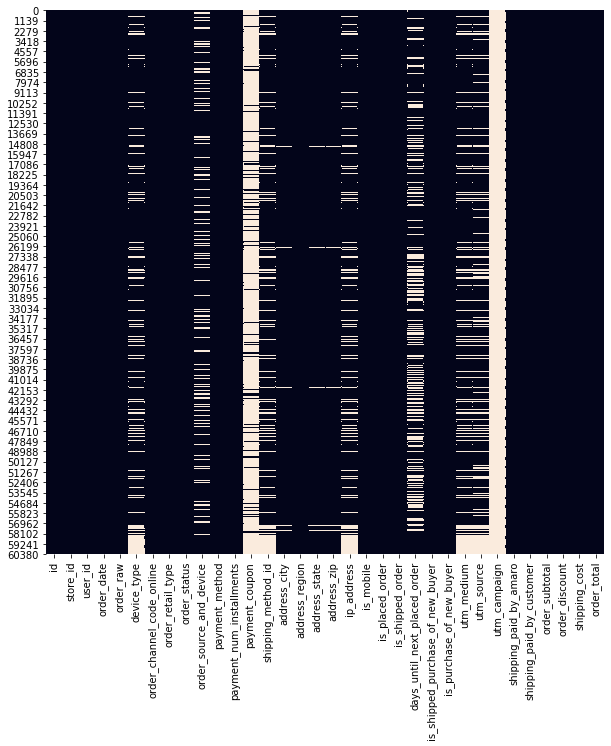

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(orders.isnull(), cbar=False);

Two columns, paymenth_coupon and utm_campaign, have lots of missing values

In [16]:
orders['payment_coupon'].unique()

array([<NA>, 'DUL-SAN', 'TOCURIOSA', 'ILOVEAMARO15', 'BRE-SOU ',
       'BRE-SOU', 'AMARO15P', 'ANA-BRE', 'PANDORA-AMARO', 'AMARO15R',
       'AMARO30', 'AMARO50', 'OQUESERA', 'DESCULPE50', 'NAOACREDITO',
       'PRIMEIRA30', '30AMARO', 'DAN-FUR', 'AMAROTEAM', 'ADR-SIL',
       'AMARO10P', 'SURPRESA', 'LOA-BLA', 'JER-OLI', 'ADR-NER',
       'AMARO30X', 'MAY-CAL', 'ANG-MEN', 'FRIENDS2016', 'AMARO15B',
       'DAN-ALC', 'VAN-JES', 'AMAROTOUR16', 'AMARO5P', 'AND-LIM',
       'DAN-OLI', 'TAY-ALC', 'MIT15AMARO', 'MEL-ROB', 'MIL-CRU',
       'ANA-BRE ', 'AMARO40', 'JOS-SIL', 'OQUESERÁ', 'AMA-SIL',
       'AMAROMAE', 'THA-SAN', 'SAC201650', 'JEF-AZE', 'JES-SIL',
       'AMARO15', 'AMARO20', 'MIS-ARA', 'STL15AMARO', 'ADR-NER ',
       'ISA-LIN', 'KAY-RAM', 'TAI-OLI', 'AMAROTEAM ', 'NÃOACREDITO',
       'BRE-ARA', 'MEL-ROB ', 'FAB-MAT', 'REN-BOM', 'LUI-FER', 'AMAROLOJ',
       'MAR-FER', 'MAY-CAL ', 'AMAROTEAM80HIG', 'DAN-ALC ', 'JER-OLI ',
       'SURPRESA ', 'PRESS20', 'DESCULPE50 ', 'VIPMO20

As there's no indicator of "no coupon", let's assume missing information means it

Also lets just set if a coupon was or not used

In [17]:
orders['payment_coupon'] = orders['payment_coupon'].fillna('NO COUPON')
orders['coupon_used'] = orders['payment_coupon'].apply(lambda x: 0 if x == 'NO COUPON' else 1)

In [18]:
orders = orders.drop(columns='utm_campaign')

It's time to approach just boleto orders

In [19]:
boleto = orders[orders['payment_method'] == 'BOLETO'].copy()

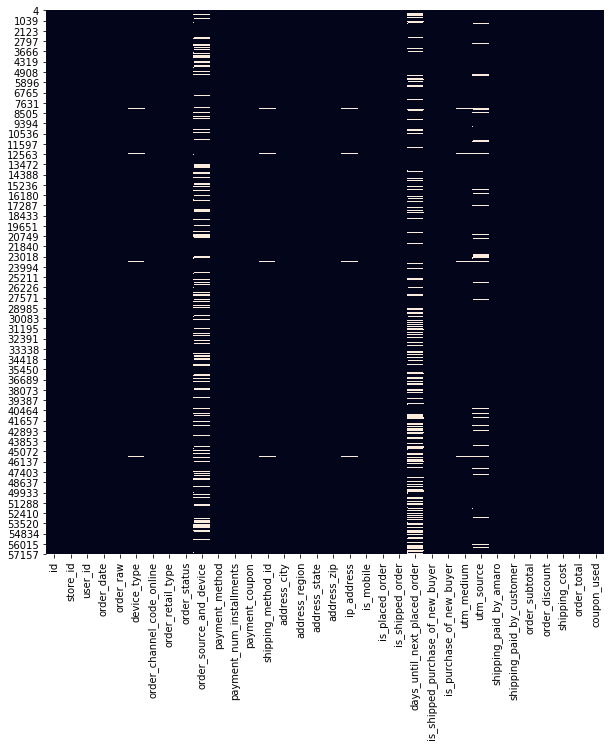

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(boleto.isnull(), cbar=False);

Information seems much more complete now

Transforming some other information now

In [21]:
boleto['shipping_paid_by_customer'] = boleto['shipping_paid_by_customer'].apply(float)
boleto['shipping_paid_by_amaro'] = boleto['shipping_paid_by_amaro'].apply(float)
boleto[(boleto['shipping_paid_by_customer'] != 0) & (boleto['shipping_paid_by_amaro'] != 0)].shape

(0, 34)

There is no shipping with shared payment

In [22]:
boleto['customer_paid_shipping'] = boleto['shipping_paid_by_customer'].apply(lambda x: 0 if float(x) == 0 else 1)

 Let's check placement time information

In [23]:
boleto['order_raw'] = pd.to_datetime(boleto['order_raw'])

In [24]:
boleto['order_raw'].dt.year.unique()

array([2016])

In [25]:
boleto['order_raw'].dt.month_name().unique()

array(['January', 'June', 'May', 'March', 'February', 'April', 'July'],
      dtype=object)

In [26]:
boleto['order_month'] = boleto['order_raw'].dt.month_name()

In [27]:
def day(x):
    if x <= 10:
        return 'beginning'
    elif x <= 20:
        return 'middle'
    else:
        return 'end'

In [28]:
def hour(x):
    if x < 6:
        return 'dawn'
    elif x < 12:
        return 'morning'
    elif x < 18:
        return 'afternoon'
    else:
        return 'night'

In [29]:
boleto['order_month_period'] = pd.to_datetime(boleto['order_raw']).dt.day.apply(day)
boleto['order_day_period'] = pd.to_datetime(boleto['order_raw']).dt.hour.apply(hour)

Analysing over these new information

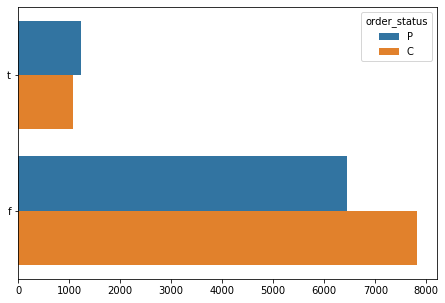

In [97]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y=boleto['coupon_used'].replace({0: 'f', 1: 't'}),
              hue=boleto['order_status'],
              order=['t', 'f'])
ax.set_ylabel('')    
ax.set_xlabel('');

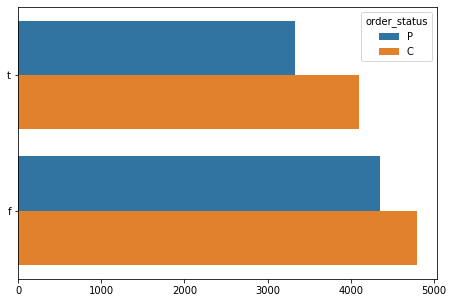

In [98]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y=boleto['customer_paid_shipping'].replace({0: 'f', 1: 't'}),
              hue=boleto['order_status'],
              order=['t', 'f'])
ax.set_ylabel('')    
ax.set_xlabel('');

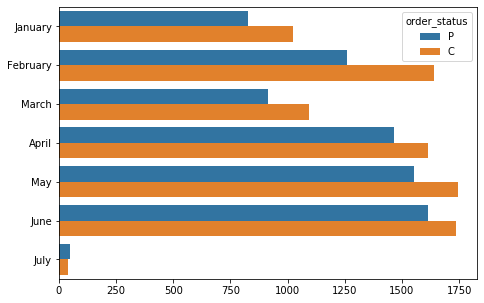

In [94]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y=boleto['order_month'],
              hue=boleto['order_status'],
              order=['January', 'February', 'March', 'April', 'May', 'June', 'July'])
ax.set_ylabel('')    
ax.set_xlabel('');

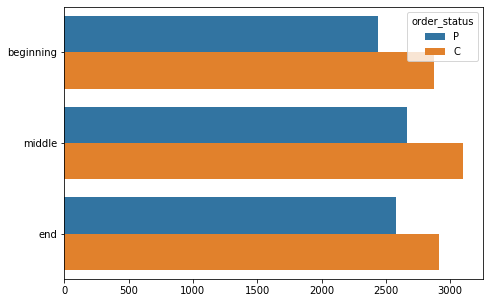

In [95]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y=boleto['order_month_period'],
              hue=boleto['order_status'],
              order=['beginning', 'middle', 'end'])
ax.set_ylabel('')    
ax.set_xlabel('');

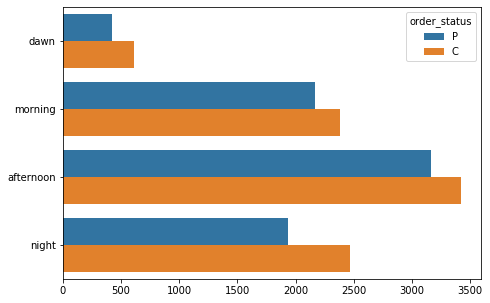

In [96]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y=boleto['order_day_period'],
              hue=boleto['order_status'],
              order=['dawn', 'morning', 'afternoon', 'night'])
ax.set_ylabel('')    
ax.set_xlabel('');

Checking information on other dataframes

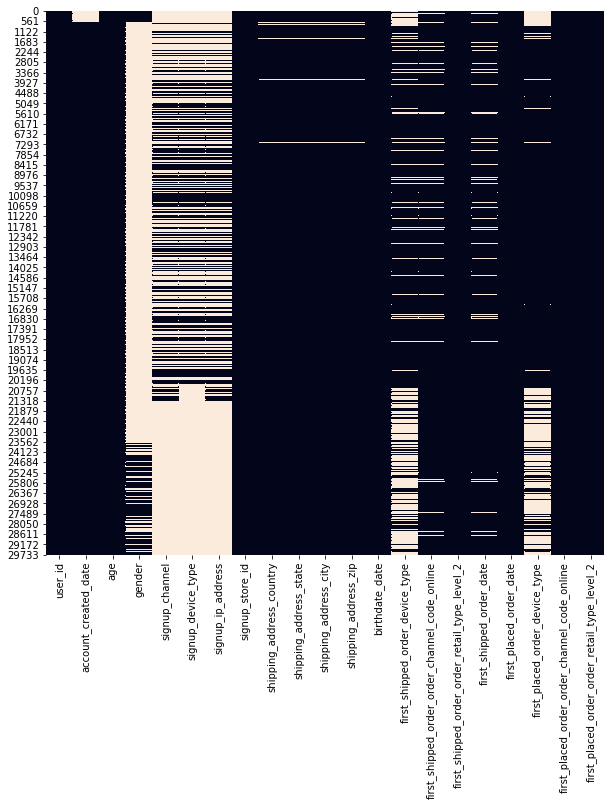

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(custmr.isnull(), cbar=False);

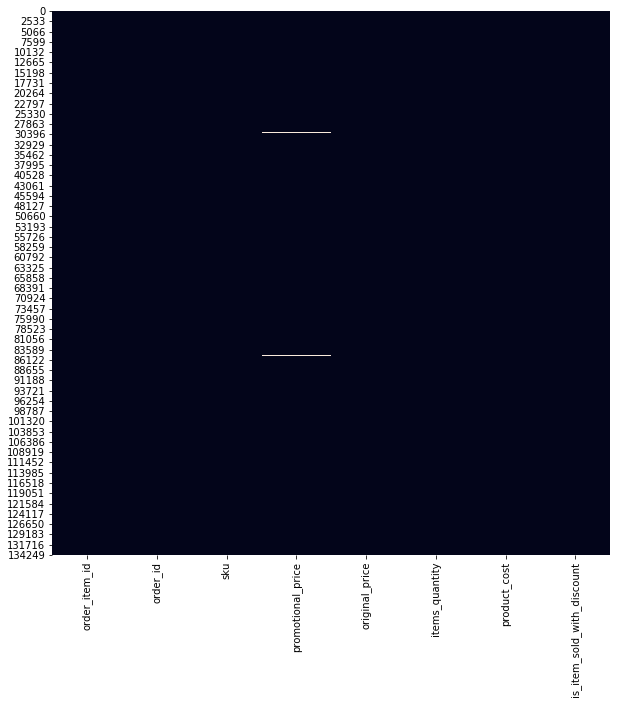

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(oitems.isnull(), cbar=False);

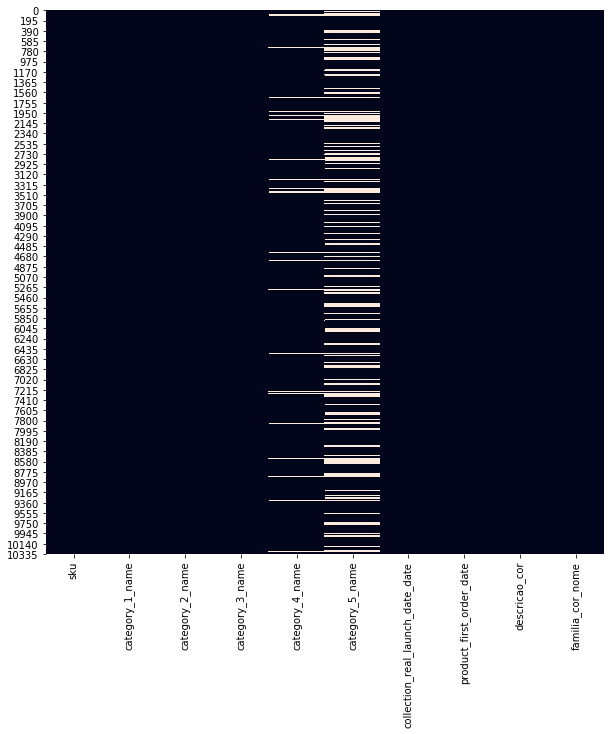

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(prdcts.isnull(), cbar=False);

Customer dataframe seems the only one with real information problem and while gender may be an important one most of these other columns refer to first order information

OrderItems seems mostly complete except for very few pricing information

Product seems fully complete as category_4_name and category_5_name are most specific information

Approaching OrderItems first, let's check these few missing information and process it

In [38]:
oitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136774 entries, 0 to 136773
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   order_item_id               136774 non-null  object
 1   order_id                    136774 non-null  object
 2   sku                         136774 non-null  object
 3   promotional_price           135978 non-null  object
 4   original_price              136518 non-null  object
 5   items_quantity              136774 non-null  object
 6   product_cost                136774 non-null  object
 7   is_item_sold_with_discount  136518 non-null  object
dtypes: object(8)
memory usage: 8.3+ MB


In [39]:
oitems = oitems.drop(index=oitems[oitems['original_price'].isna() & oitems['promotional_price'].isna()].index)

Items without promotional price information but that are not sold with discount can hold the original price

Items with promotional price confirmed but without value information cannot have it inferred

In [40]:
miss = oitems[(oitems['promotional_price'].isna()) & (oitems['is_item_sold_with_discount'] == 'f')].index
oitems.loc[miss, 'promotional_price'] = oitems.loc[miss, 'original_price']

In [41]:
oitems[(oitems['promotional_price'].isna()) & (oitems['is_item_sold_with_discount'] == 't')].shape

(107, 8)

In [42]:
miss = index=oitems[(oitems['promotional_price'].isna()) & (oitems['is_item_sold_with_discount'] == 't')].index
oitems = oitems.drop(index=miss)

It's impossible to infer anything about products without information about one of the prices and the promotional price confirmation

In [43]:
oitems['is_item_sold_with_discount'] = oitems['is_item_sold_with_discount'].fillna(-1).replace({'f': 0, 't': 1})

Approaching Products now

In [44]:
prdcts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10482 entries, 0 to 10481
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   sku                               10482 non-null  object
 1   category_1_name                   10482 non-null  object
 2   category_2_name                   10475 non-null  object
 3   category_3_name                   10475 non-null  object
 4   category_4_name                   10098 non-null  object
 5   category_5_name                   7832 non-null   object
 6   collection_real_launch_date_date  10482 non-null  object
 7   product_first_order_date          10482 non-null  object
 8   descricao_cor                     10482 non-null  object
 9   familia_cor_nome                  10482 non-null  object
dtypes: object(10)
memory usage: 819.0+ KB


In [45]:
prdcts['category_1_name'].unique()

array(['Feminino'], dtype=object)

In [46]:
prdcts['category_2_name'].unique()

array(['Moda', 'Acessórios', <NA>], dtype=object)

In [47]:
prdcts['category_3_name'].unique()

array(['Roupas', 'Meia-Calça', 'Chapéus', 'Bolsas', 'Bijoux',
       'Óculos de Sol', 'Outros', 'Cintos', 'Lenços', 'Cabelo', 'Praia',
       'Active', <NA>], dtype=object)

In [48]:
prdcts['category_4_name'].unique()

array(['Jaquetas & Casacos', <NA>, 'Aba Larga', 'Midi', 'Colares',
       'Quadrado', 'Pulseiras', 'Blusas', 'Vestidos', 'Saias', 'Brincos',
       'Calças', 'Anéis', 'Blazers', 'Luvas', 'Maxi', 'Mini',
       'Suéters & Cardigãs', 'Coletes & Kimonos', 'Broches', 'Shorts',
       'Macacão', 'Calcinhas', 'Tops', 'Maiôs', 'Saídas de Praia',
       'Lenço Longo', 'Bucket', 'Jaquetas', 'Regatas & Camisetas',
       'Leggings', 'Redondo', 'Faixa de Cabelo', 'Aviador',
       'Cinto Estreito', 'Aba Estreita', 'Flap', 'Cinto Grosso',
       'D-Framed', 'Gatinho'], dtype=object)

In [49]:
prdcts['category_5_name'].unique()

array(['Casacos', <NA>, 'Camisas', 'Regatas', 'Curto', 'Mini', 'Midi',
       'Blusas', 'Pantalona', 'Reta', 'Maxi', 'Flare', 'Suéters',
       'Tricôs', 'Coletes', 'Cropped', 'Jaquetas', 'Skinny', 'Macaquinho',
       'Macacão', 'Slip', 'Camisetas', 'Hot Pants', 'Lacinho',
       'Borboleta', 'Cortininha', 'Tomara que Caia', 'Frente Única',
       'Kimonos', 'Jeans', 'Cardigãs', 'Body', 'Leather',
       'Capas & Ponchos', 'Boyfriend'], dtype=object)

There is no way to infer product information when only category_1_name is available

In [50]:
miss = prdcts[prdcts['category_2_name'].isna()].index
prdcts = prdcts.drop(index=miss)

In [51]:
prdcts['category_2_name'].value_counts()

Moda          8821
Acessórios    1654
Name: category_2_name, dtype: int64

Checking accessory extra categories

In [52]:
prdcts[prdcts['category_2_name'] == 'Acessórios']['category_3_name'].unique()

array(['Meia-Calça', 'Chapéus', 'Bolsas', 'Bijoux', 'Óculos de Sol',
       'Outros', 'Cintos', 'Lenços', 'Cabelo'], dtype=object)

In [53]:
prdcts[prdcts['category_2_name'] == 'Acessórios']['category_4_name'].unique()

array([<NA>, 'Aba Larga', 'Midi', 'Colares', 'Quadrado', 'Pulseiras',
       'Brincos', 'Anéis', 'Luvas', 'Maxi', 'Mini', 'Broches',
       'Lenço Longo', 'Bucket', 'Redondo', 'Faixa de Cabelo', 'Aviador',
       'Cinto Estreito', 'Aba Estreita', 'Flap', 'Cinto Grosso',
       'D-Framed', 'Gatinho'], dtype=object)

Checking clothing extra categories

In [54]:
prdcts[prdcts['category_2_name'] == 'Moda']['category_3_name'].unique()

array(['Roupas', 'Praia', 'Active'], dtype=object)

In [55]:
prdcts[prdcts['category_2_name'] == 'Moda']['category_4_name'].unique()

array(['Jaquetas & Casacos', 'Blusas', 'Vestidos', 'Saias', 'Calças',
       'Blazers', 'Suéters & Cardigãs', 'Coletes & Kimonos', 'Shorts',
       'Macacão', 'Calcinhas', 'Tops', 'Maiôs', 'Saídas de Praia',
       'Jaquetas', 'Regatas & Camisetas', 'Leggings'], dtype=object)

In [56]:
prdcts[prdcts['category_2_name'] == 'Moda']['category_4_name'].value_counts()

Blusas                 2472
Vestidos               1935
Calças                 1119
Saias                   643
Jaquetas & Casacos      406
Suéters & Cardigãs      391
Shorts                  372
Tops                    333
Macacão                 301
Calcinhas               255
Coletes & Kimonos       169
Blazers                 115
Regatas & Camisetas     111
Leggings                102
Saídas de Praia          41
Maiôs                    29
Jaquetas                 27
Name: category_4_name, dtype: int64

Last, approaching Customers

In [57]:
custmr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30293 entries, 0 to 30292
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   user_id                                        30293 non-null  object
 1   account_created_date                           29668 non-null  object
 2   age                                            30270 non-null  object
 3   gender                                         4717 non-null   object
 4   signup_channel                                 10548 non-null  object
 5   signup_device_type                             10233 non-null  object
 6   signup_ip_address                              10548 non-null  object
 7   signup_store_id                                30293 non-null  object
 8   shipping_address_country                       30052 non-null  object
 9   shipping_address_state                         30052 non-null

Here we must proccess what is possible to

First transform ages into ranges

In [58]:
from math import floor

In [59]:
custmr['age_range'] = custmr['age'].fillna(-100).apply(int)
custmr['age_range'] = custmr['age_range'].apply(lambda x: 20 if x in (18, 19) else floor(x/10)*10)

In [60]:
def age(x):
    if x in (20, 30, 40, 50):
        return 'Adult'
    elif x > 50:
        return 'Elderly'
    elif x == -100:
        return 'Miss'
    else:
        return 'Underage'

In [61]:
custmr['age_range'] = custmr['age_range'].apply(age)

In [62]:
custmr['shipping_address_country'] = custmr['shipping_address_country'].fillna('miss')
custmr['shipping_address_state'] = custmr['shipping_address_state'].fillna('miss')
custmr['shipping_address_city'] = custmr['shipping_address_city'].fillna('miss')

After proccessing these datasets it's time to analyse more data

Left joining Orders dataset all the way with Products

In [101]:
join01 = boleto.set_index('id').join(oitems.set_index('sku').join(prdcts.set_index('sku')).set_index('order_id'))

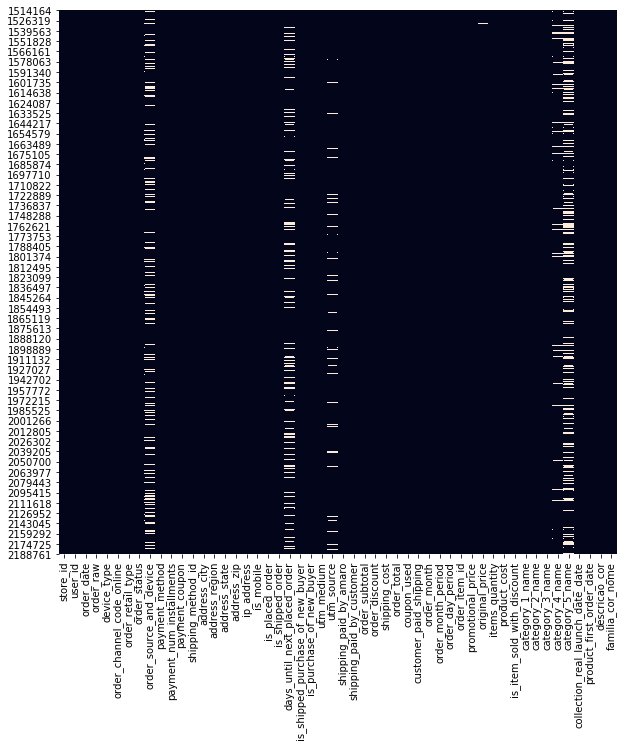

In [102]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(join01.isnull(), cbar=False);

In [103]:
groups = join01.reset_index(False)[['index', 'order_status', 'is_item_sold_with_discount']].groupby('index')

In [104]:
intmed = groups.max()
mask = intmed['is_item_sold_with_discount'] != -1

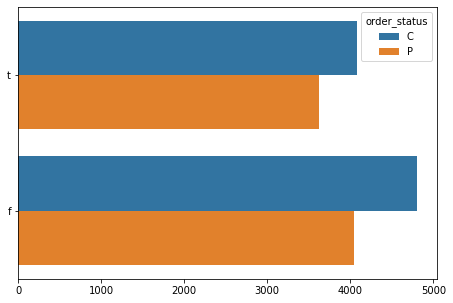

In [105]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y=intmed[mask]['is_item_sold_with_discount'].replace({0: 'f', 1: 't'}),
              hue=intmed['order_status'],
              order=['t', 'f'])
ax.set_ylabel('')    
ax.set_xlabel('');

In [106]:
intmed = groups.count()
intmed['order_status'] = groups.max()['order_status']
intmed.columns = ['order_status', 'number_of_items']

In [107]:
intmed['number_of_items'] = intmed['number_of_items'].apply(lambda x: '10+' if x >= 10 else x)

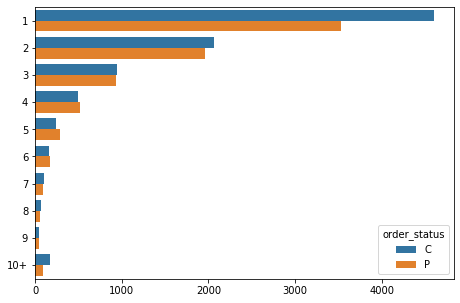

In [109]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y=intmed['number_of_items'], hue=intmed['order_status'],
              order=[1,2,3,4,5,6,7,8,9,'10+'])
ax.set_ylabel('')    
ax.set_xlabel('');

Left joining Orders with Customers

In [111]:
join02 = boleto.set_index('user_id').join(custmr.set_index('user_id'))

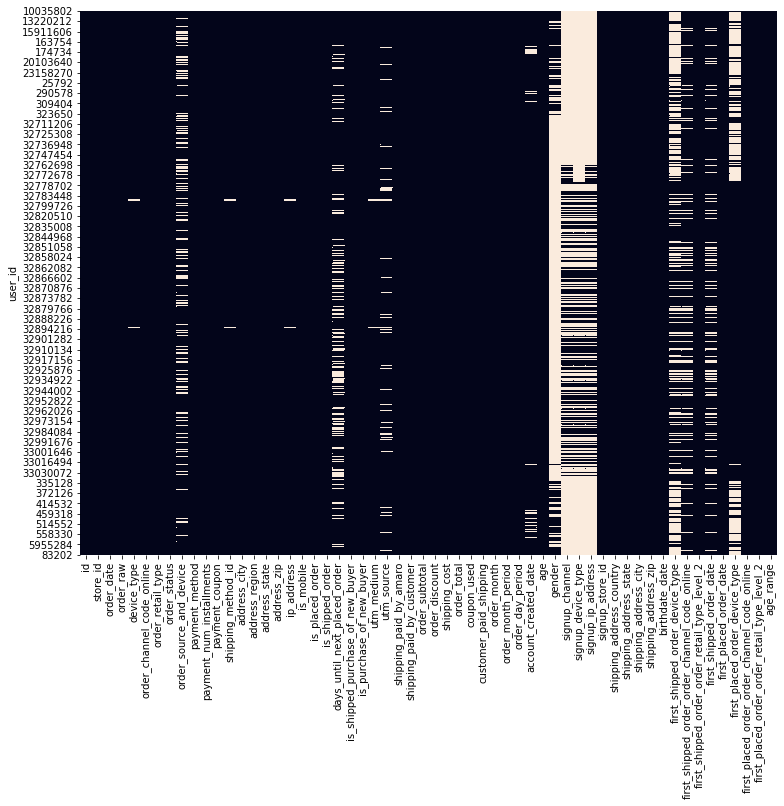

In [112]:
fig, ax = plt.subplots(figsize=(12.5, 10))
sns.heatmap(join02.isnull(), cbar=False);

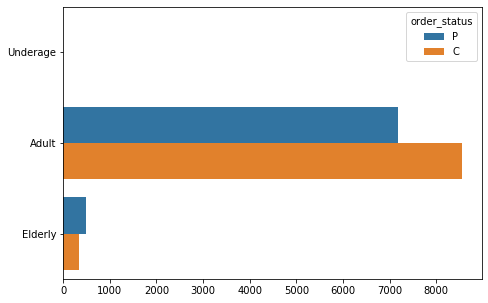

In [113]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y='age_range', hue='order_status',
              data=join02.drop(index=join02[join02['age_range'] == 'Miss'].index),
              order=['Underage', 'Adult', 'Elderly'])
ax.set_ylabel('')    
ax.set_xlabel('');

In [125]:
from math import floor
intmed = join02[join02['age_range'] == 'Adult']['age'].apply(lambda x: '20s' if x in ['18', '19']
                                                             else str(floor(int(x)/10)*10)+'s').to_frame()

In [126]:
intmed['order_status'] = join02[join02['age_range'] == 'Adult']['order_status']

In [127]:
intmed

,age,order_status
user_id,,
10035802,40s,P
10035802,40s,C
10035802,40s,C
10040234,40s,C
101174,50s,P
...,...,...
99826,30s,C
99852,20s,C
99942,20s,C


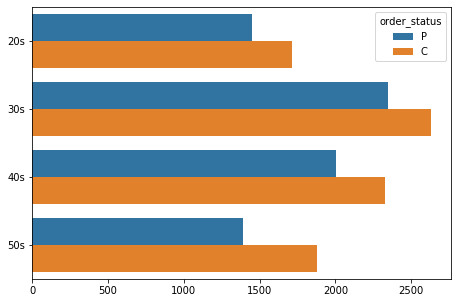

In [129]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y=intmed['age'], hue=intmed['order_status'], order=['20s', '30s', '40s', '50s'])
ax.set_ylabel('')    
ax.set_xlabel('');

In [114]:
mask = join02['birthdate_date'].isna()
intmed = join02[~mask].copy()

In [115]:
intmed['birthdate_date'] = pd.to_datetime(intmed['birthdate_date'])

In [116]:
intmed['purchased_on_birthmonth'] = intmed['birthdate_date'].dt.month == intmed['order_raw'].dt.month

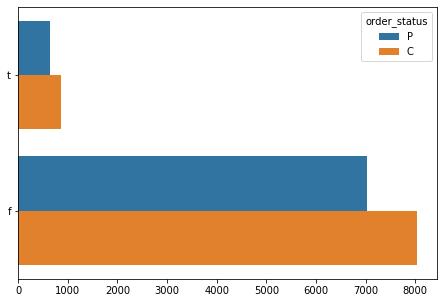

In [117]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y=intmed['purchased_on_birthmonth'].replace({True: 't', False: 'f'}), hue=intmed['order_status'],
              order=['t', 'f'])
ax.set_ylabel('')    
ax.set_xlabel('');

In [78]:
join02[['address_city', 'address_region', 'address_state', 'address_zip',
        'shipping_address_state', 'shipping_address_city', 'shipping_address_zip']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 16574 entries, 10035802 to 99990
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   address_city            16574 non-null  object
 1   address_region          16574 non-null  object
 2   address_state           16574 non-null  object
 3   address_zip             16574 non-null  object
 4   shipping_address_state  16572 non-null  object
 5   shipping_address_city   16572 non-null  object
 6   shipping_address_zip    16571 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [79]:
join02[join02['shipping_address_zip'].isna()][['shipping_address_state', 'shipping_address_city', 'shipping_address_zip']]

,shipping_address_state,shipping_address_city,shipping_address_zip
user_id,,,
158176,miss,miss,<NA>
32739666,NaN,NaN,NaN
32867932,NaN,NaN,NaN


In [130]:
miss = join02[join02['shipping_address_zip'].isna()].index
intmed = join02.drop(index=miss)[['order_status', 'address_city', 'address_region', 'address_state',
                                  'address_zip', 'shipping_address_state', 'shipping_address_city',
                                  'shipping_address_zip']]

In [131]:
intmed['same_city'] = intmed['address_city'] == intmed['shipping_address_city']
intmed['same_state'] = intmed['address_state'] == intmed['shipping_address_state']

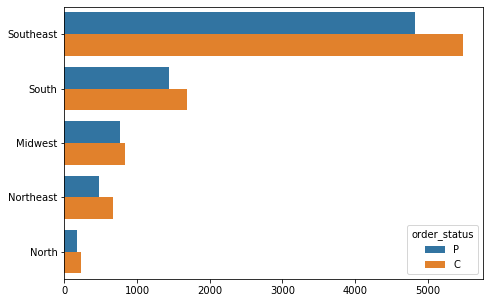

In [136]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y=intmed['address_region'], hue=intmed['order_status'])
ax.set_ylabel('')    
ax.set_xlabel('');

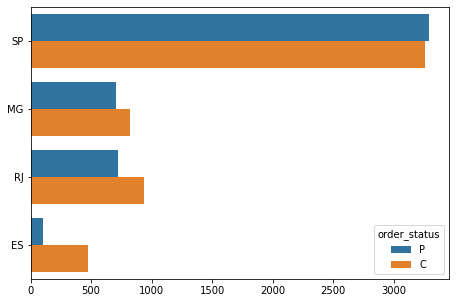

In [137]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y='address_state', hue='order_status',
              data=intmed[intmed['address_region'] == 'Southeast'])
ax.set_ylabel('')    
ax.set_xlabel('');

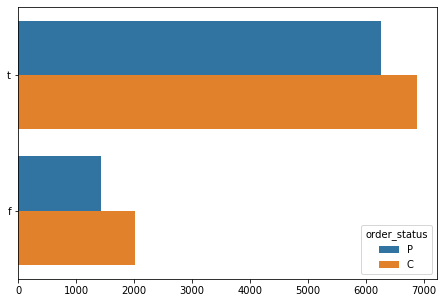

In [138]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y=intmed['same_city'].replace({True: 't', False: 'f'}), hue=intmed['order_status'])
ax.set_ylabel('')    
ax.set_xlabel('');

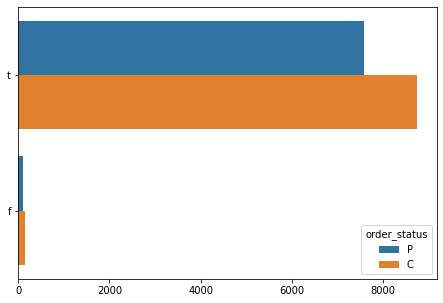

In [139]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.countplot(y=intmed['same_state'].replace({True: 't', False: 'f'}), hue=intmed['order_status'])
ax.set_ylabel('')    
ax.set_xlabel('');